<a href="https://colab.research.google.com/github/isharridho/Cohort-Analysis/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test Cohort Analysis - Raw.csv')

In [4]:
# pd.set_option('display.float_format', lambda x: '%.f' % x)

In [5]:
# Drop Unwanted Feature

df.drop(['First Sales','Account Age','Age'],axis=1,inplace=True)

In [6]:
# Check General Info Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16610 entries, 0 to 16609
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         16610 non-null  object 
 1   Customer ID     16610 non-null  object 
 2   Notes           16610 non-null  object 
 3   Provinsi        16413 non-null  object 
 4   Kota/Kabupaten  16413 non-null  object 
 5   Kecamatan       16405 non-null  object 
 6   Sales Manager   16592 non-null  object 
 7   Booking (Rp)    16610 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.0+ MB


In [7]:
# Change "Tanggal" Type from Object to Datetime 

df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Cohort Analysis

In [8]:
# Create feature InvoiceMonth & CohortMonth

import datetime

def get_month(x): return datetime.datetime(x.year, x.month, 1)

df['InvoiceMonth'] = df['Tanggal'].apply(get_month)
grouping = df.groupby('Customer ID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')
df.head()

,Tanggal,Customer ID,Notes,Provinsi,Kota/Kabupaten,Kecamatan,Sales Manager,Booking (Rp),InvoiceMonth,CohortMonth
0,2021-01-20,SHOXR100012,Order - Arisan Monthly,Jawa Barat,Cianjur,Cilaku,SM - Herman,1492000.0,2021-01-01,2021-01-01
1,2021-03-07,SHOXR100056,Order - Cash,Jawa Barat,Ciamis,Ciamis,SM - David,289600.0,2021-03-01,2021-03-01
2,2021-01-29,SHOXR100101,Order - Arisan Monthly,Jawa Tengah,Cilacap,Kesugihan,TM - Puspita Asmarani Widyaningrum,1478400.0,2021-01-01,2021-01-01
3,2021-07-26,SHOXR100101,Order - Arisan Monthly,Jawa Tengah,Cilacap,Kesugihan,TM - Puspita Asmarani Widyaningrum,1680000.0,2021-07-01,2021-01-01
4,2021-02-03,SHOXR100123,Order - Arisan Monthly,Jawa Barat,Sukabumi,Surade,TM - Oni Meimunah,4774400.0,2021-02-01,2021-02-01


In [9]:
# Create Time Offset Cohort Analysis by Adding 'CohortIndex' Feature

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month
invoice_year, invoice_month= get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month = get_date_int(df, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df['CohortIndex'] = years_diff * 12 + months_diff + 1

In [10]:
#Count the Customers Who Still Rebuying From Their First Purchases

grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_counts = grouping['Customer ID'].apply(pd.Series.nunique).reset_index().pivot(index='CohortMonth',columns='CohortIndex',values='Customer ID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2020-11-01,236.0,144.0,125.0,83.0,89.0,84.0,61.0,51.0,73.0,83.0,77.0,56.0
2020-12-01,248.0,108.0,76.0,60.0,44.0,38.0,43.0,52.0,62.0,52.0,30.0,NaN
2021-01-01,357.0,173.0,114.0,91.0,72.0,67.0,90.0,98.0,101.0,45.0,NaN,NaN
2021-02-01,416.0,143.0,100.0,54.0,79.0,79.0,87.0,97.0,44.0,NaN,NaN,NaN
2021-03-01,543.0,218.0,101.0,83.0,112.0,130.0,123.0,50.0,NaN,NaN,NaN,NaN
2021-04-01,354.0,81.0,47.0,61.0,56.0,65.0,28.0,NaN,NaN,NaN,NaN,NaN
2021-05-01,242.0,67.0,56.0,51.0,46.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-01,212.0,74.0,57.0,60.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,275.0,94.0,85.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
cohort_counts[1].sum()

3816.0

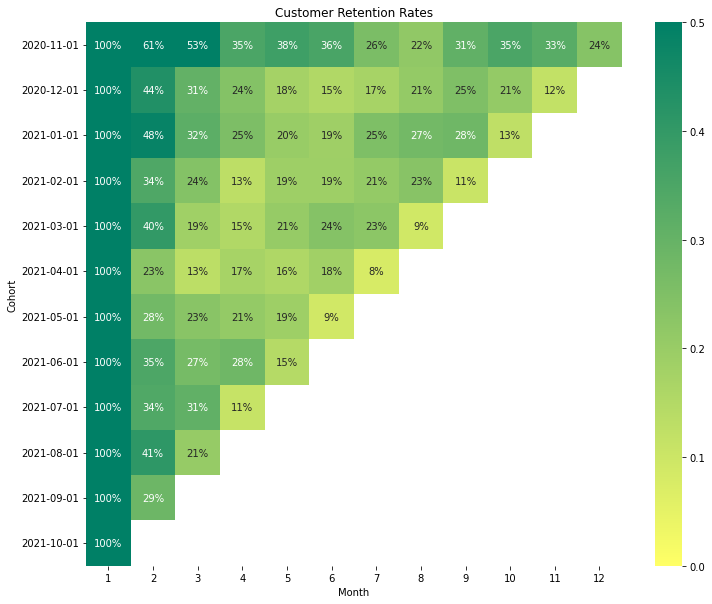

In [12]:
# Visualize Customer Retention Rate 

cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index=retention.index.date
plt.figure(figsize=(12,10))
plt.title('Customer Retention Rates')
sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.0,
           vmax=0.5,
           cmap='summer_r')
plt.xlabel('Month')
plt.ylabel('Cohort')
plt.show()

Berdasarkan grafik retention rate customer, Customer dikelompokkan menjadi 12 cohort berdasarkan waktu pertama kali transaksi dilakukan. dimulai dari cohort pertama di bulan November 2020, hingga cohort terakhir di bulan Oktober 2021. Dengan grafik ini, akan dilihat persentase customer yang melakukan transaksi ulang di bulan-bulan berikutnya.

Jika dilihat grafik di atas terlihat bahwa di setiap cohort terjadi penurunan jumlah customer yang melakukan transaksi yang cukup signifikan di bulan2 berikutnya, dengan rata-rata penurunan sekitar 40-60 %. Contohnya customer yang berada di cohort bulan Januari 2021, pada bulan ke 2 customer yang melakukan transaksi ulang hanya sekitar 48%, atau terjadi penurunan sebesar 52% dibanding bulan pertama, lalu di bulan ke 3 kembali turun menjadi sekitar 32%. Namun jika dilihat secara keseluruhan, penurunan paling kecil berada pada kelompok cohort pertama yaitu pada November 2020 sedangkan penurunan paling besar berada pada kelompok cohort bulan April 2021. Ini menunjukkan bahwa customer yang paling loyal adalah customer yang berada pada tahap awal-awal saat program diluncurkan.

In [13]:
# Plotting Customer Retention Rate

all = []

for i in range(1,13):
  all.append(retention[i].mean())

In [14]:
all_user = pd.DataFrame({'value':all}).reset_index()
all_user['value'] = all_user['value']*100
all_user['value'] = all_user['value'].round(2)

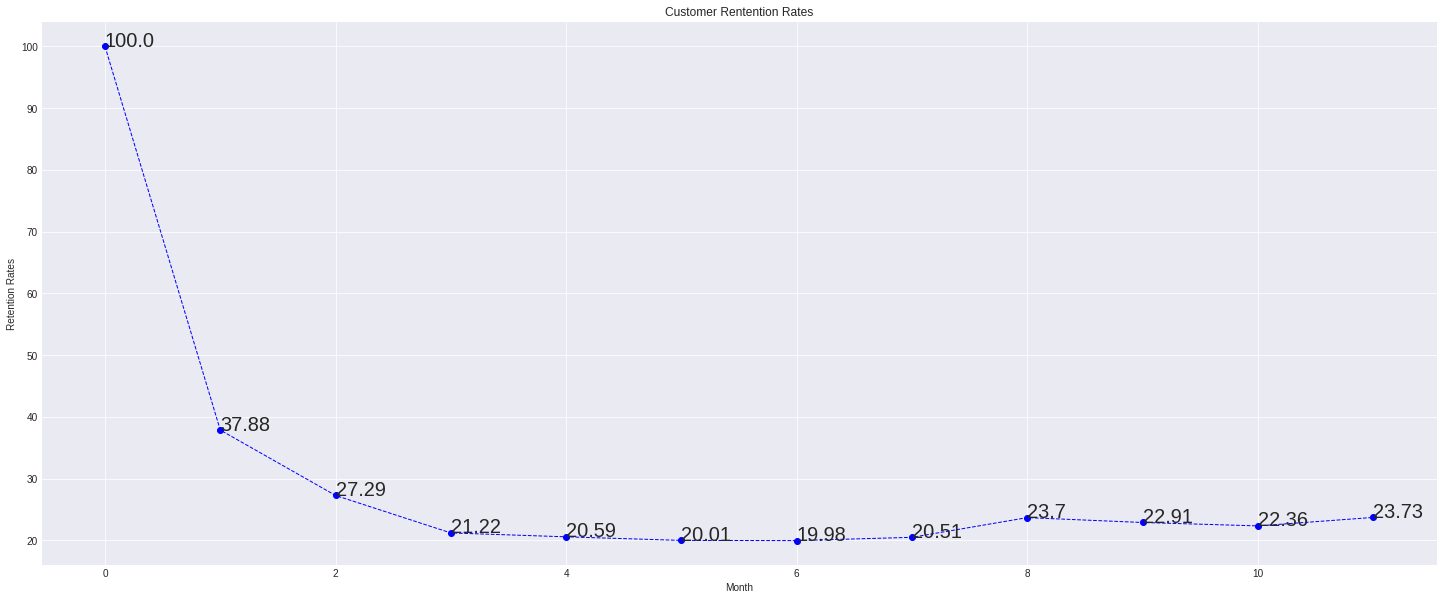

In [15]:
plt.figure(figsize=(25,10))
plt.style.use('seaborn-darkgrid')
plt.plot(all_user['index'],all_user['value'],marker='o',linestyle='--',linewidth=1,c='b')
for a,b in zip(all_user['index'], all_user['value']): 
    plt.text(a, b, str(b),size=20)
plt.xlabel('Month')
plt.ylabel('Retention Rates')
plt.title('Customer Rentention Rates')
plt.show()

Kurva diatas menunjukkan dari total 3816 customer. Sekitar 65% pengguna berhenti melakukan transaksi ulang setelah bulan pertama. Setelah penurunan besar awal tersebut, lalu di bulan-bulan selanjutnya turun kembali sekitar 10% sampai 15%. sehingga terlihat jumlah customer yang masih aktif melakukan transaksi ulang hanya menyisakan sekitar 20-25% dari jumlah customer awal.

Lalu untuk menjawab pertanyaan di bulan keberapakah kemungkinan besar customer melakukan repeat order? jika dilihat di kurva diatas, terlihat bahwa customer cenderung melakukan transaksi ulang pada bulan ke 8. Karena pada bulan tersebut terlihat adanya sedikit kenaikan dibanding bulan-bulang sebelumnya.

In [16]:
# Count The Value of Repeat Order Transaction

grouping2 = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_counts2 = grouping2['Booking (Rp)'].sum().reset_index().pivot(index='CohortMonth',columns='CohortIndex',values='Booking (Rp)')
cohort_counts2

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2020-11-01,3.140187e+08,431831455.2,329579552.0,180131920.0,444186104.0,327696368.0,402709224.0,174335289.6,515967846.4,684190480.0,676474040.0,280501867.2
2020-12-01,4.607607e+08,214052532.0,115669920.0,201595252.0,144805456.0,216604768.0,144856306.4,229008483.2,363684163.2,298903443.2,131090492.0,NaN
2021-01-01,9.624487e+08,386611256.0,376856772.8,235358960.0,284654880.0,185121506.4,350733769.6,524030019.2,589109848.0,149851302.4,NaN,NaN
2021-02-01,1.029918e+09,507023459.2,308815840.0,254681059.2,226387680.0,339425863.2,447480400.0,537123723.2,163304496.0,NaN,NaN,NaN
2021-03-01,1.509106e+09,722533840.0,502741280.0,234306556.0,434675766.4,619210569.6,728657641.6,203868329.6,NaN,NaN,NaN,NaN
2021-04-01,7.939940e+08,311413520.0,147544000.0,261967619.2,306386160.0,348477603.2,125993090.4,NaN,NaN,NaN,NaN,NaN
2021-05-01,8.252334e+08,192446843.2,168829849.6,273184080.0,315156809.6,87528476.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-01,6.729718e+08,311293846.4,307568720.0,393866027.2,205618148.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,9.426975e+08,553805046.4,485452040.0,128406066.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


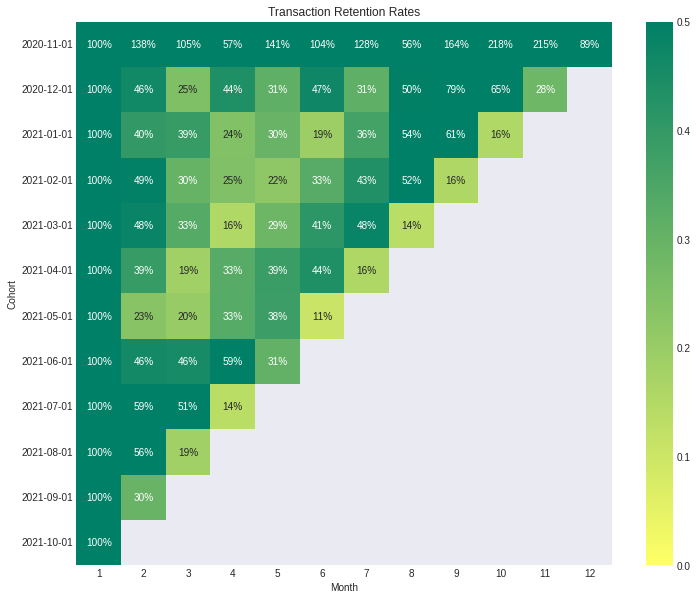

In [17]:
# Visualize Transaction Retention Rates

cohort_sizes2 = cohort_counts2.iloc[:,0]
retention2 = cohort_counts2.divide(cohort_sizes2, axis=0)
retention2.index=retention2.index.date
plt.figure(figsize=(12,10))
plt.title('Transaction Retention Rates')
sns.heatmap(data = retention2,
           annot = True,
           fmt = '.0%',
           vmin= 0.0,
           vmax=0.5,
           cmap='summer_r')
plt.xlabel('Month')
plt.ylabel('Cohort')
plt.show()

Berdasarkan grafik transaction retention terlihat nilai transaksi pada cohort pertama mengalami kenaikan yang cukup baik pada bulan pertama setelah transaksi awal. Sangat berbanding terbalik dengan kelompok cohort lainnya yang malah mengalami penurunan di bulan pertama setelah transaksi awal

In [18]:
# Plotting Transaction Retention Rate

all2 = []

for i in range(1,13):
  all2.append(retention2[i].mean())

In [19]:
all_user2 = pd.DataFrame({'value':all2}).reset_index()
all_user2['value'] = all_user2['value']*100
all_user2['value'] = all_user2['value'].round(2)

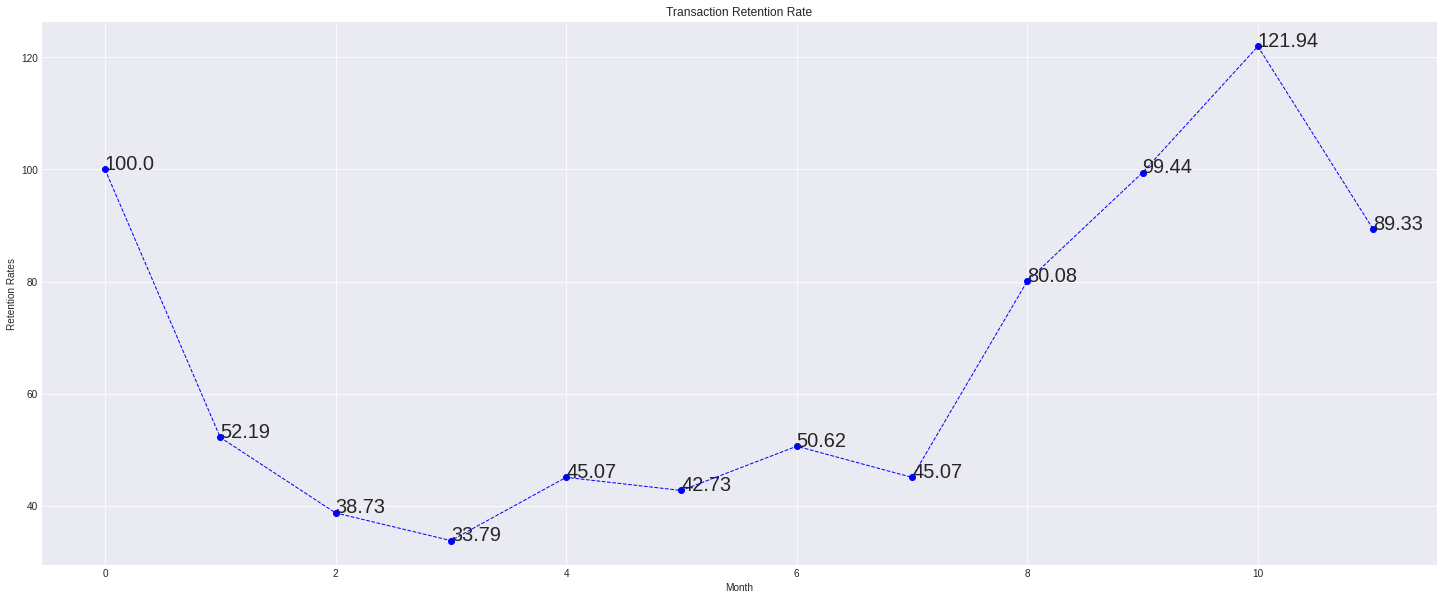

In [20]:
plt.figure(figsize=(25,10))
plt.plot(all_user2['index'],all_user2['value'],marker='o',linestyle='--',linewidth=1,c='b')
for a,b in zip(all_user2['index'], all_user2['value']): 
    plt.text(a, b, str(b), size=20)
plt.xlabel('Month')
plt.ylabel('Retention Rates')
plt.title('Transaction Retention Rate')
plt.show()

Dengan melihat kurva diatas dapat dilihat bahwa terdapat suatu pola pada nilai transaksi repeat order. Di bulan pertama setelah transaksi, nilai transaksi mengalami penurunan hampir 50% dari nilai transaksi awal, penurunan ini terus terjadi hingga bulan ke 3 dimana nilai transaksi hanya berkisar 30% dari nilai transaksi awal, namun mulai bulan ke 4, nilai transaksi mulai mengalami kenaikan secara perlahan. Bahkan pada bulan ke 10, nilai transaksi mengalami kenaikan yang sangat signifikan, yaitu penambahan 20% dari nilai transaksi awal.

# Number of Order

In [21]:
pie = df['Notes'].value_counts().to_frame().reset_index()
pie

,index,Notes
0,Order - Arisan Monthly,12051
1,Order - Cash,4364
2,Order - Arisan Weekly,195


Text(0.5, 1.0, 'Proportion of Order')

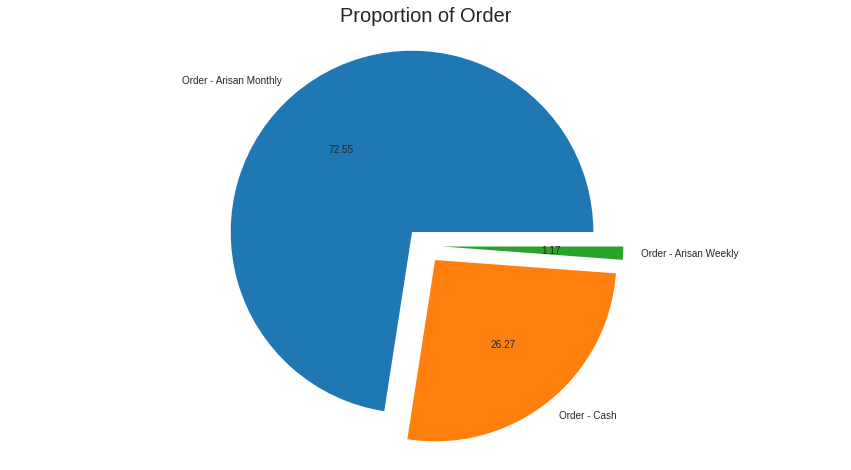

In [36]:
# Proportion of Order

plt.figure(figsize=(15,8))
plt.pie(x=pie['Notes'],labels=pie['index'].tolist(),autopct='%.2f',explode=(0.1,0.1,0.1))
plt.axis('equal')
plt.title('Proportion of Order',size = 20)

Jika dilihat berdasarkan data transaksi yang ada, order jenis Arisan Monthly memiliki proporsi yang paling besar dilakukan oleh customer dibanding order jenis lainnya. Dapat dilihat bahwa sekitar 72% transaksi yang dilakukan oleh customer menggunakan order jenis Arisan Monthly. sedangkan proporsi paling sedikit adalah order jenis Arisan Weekly yang hanya 1% dari proporsi total.

# Best Sales Manager

In [23]:
df_sm = pd.DataFrame(df['Booking (Rp)'].groupby(df['Sales Manager']).sum().sort_values(ascending=False).head(10).reset_index())

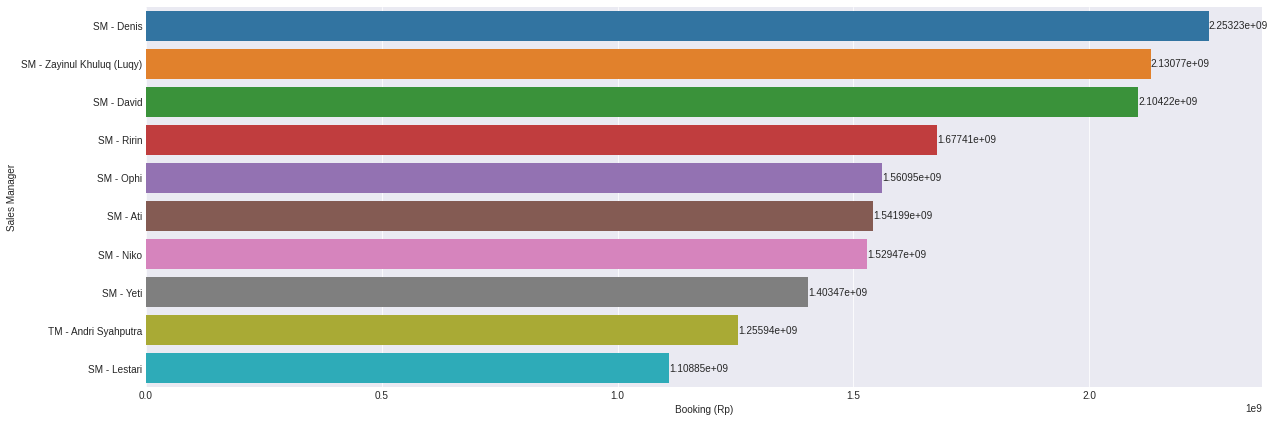

In [24]:
plt.figure(figsize=(20,7))
ax = sns.barplot(y='Sales Manager',x='Booking (Rp)',data=df_sm)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [25]:
# Number of Transaction Top 10 Sales Manager

df['Sales Manager'].value_counts().head(10)

SM - Denis                    1097
SM - Ririn                     985
SM - David                     948
SM - Yeti                      904
SM - Zayinul Khuluq (Luqy)     893
SM - Niko                      837
SM - Ati                       811
SM - Ophi                      753
SM - Lestari                   638
TM - Andri Syahputra           544
Name: Sales Manager, dtype: int64

Sales manager yang menghasilkan total revenue tertinggi adalah Denis dengan total revenue Rp. 2.25 M, diikuti oleh Zayinul Khuluq dengan total revenue Rp. Rp. 2.13 M, lalu David dengan total revenue Rp. 2.10 M. Yang menarik dari data diatas adalah jika dilihat dari jumlah transaksi, Ririn memiliki jumlah transaksi yang lebih banyak dari pada David dan Zayinul Khuluq, namun ternyata dari segi total revenue, Ririn hanya berhasil mengumpulkan total revenue sebesar Rp. 1.6 M. sehingga berada di posisi ke 4 di daftar sales manager terbaik  

# Customer Geographic 

In [26]:
df_city_rev = df['Booking (Rp)'].groupby(df['Kota/Kabupaten']).mean().to_frame().reset_index()

In [27]:
df_city_rev.replace('Jembarana','Jembrana',inplace=True)
df_city_rev.replace('Jembaran','Jembrana',inplace=True)
df_city_rev.replace('Sumed','Sumedang',inplace=True)
df_city_rev.replace('Kendal','Kendal Jawa Tengah',inplace=True)
df_city_rev.replace('Pati','Pati Jawa Tengah',inplace=True)
df_city_rev.replace('Subang','Subang Jawa Barat',inplace=True)
df_city_rev.replace('Kudus','Kudus Jawa Tengah',inplace=True)
df_city_rev.replace('Gresik Jawa Timur','Kota Gresik Jawa Timur',inplace=True)
df_city_rev.replace('Arang','Semarang',inplace=True)

In [28]:
df_city_rev['Kota/Kabupaten'].unique()

array(['Semarang', 'Badung', 'Bandar Lampung', 'Bandung', 'Bandung Barat',
       'Bangka Barat', 'Bangkalan', 'Bangli', 'Banjar', 'Banjarnegara',
       'Bantul', 'Banyumas', 'Banyuwangi', 'Batang', 'Batu',
       'Batu Malang', 'Bekasi', 'Blitar', 'Blora', 'Bogor', 'Bojonegoro',
       'Bondowoso', 'Boyolali', 'Brebes', 'Buleleng', 'Ciamis', 'Cianjur',
       'Cicalengka', 'Cilacap', 'Cilegon', 'Cimahi', 'Cirebon', 'Demak',
       'Denpasar', 'Depok', 'Dompu', 'Garut', 'Gianyar', 'Gresik',
       'Grobogan', 'Gunung Kidul', 'Gunungkidul', 'Indramayu',
       'Jakarta Barat', 'Jakarta Pusat', 'Jakarta Selatan',
       'Jakarta Timur', 'Jakarta Utara', 'Jembrana', 'Jember', 'Jepara',
       'Jombang', 'Kab Bandung', 'Kab. Serang', 'Kabupaten Bandung',
       'Kabupaten Bandung Barat', 'Kabupaten Blora', 'Kabupaten Bogor',
       'Kabupaten Ciamis', 'Kabupaten Garut', 'Kabupaten Klaten',
       'Kabupaten Kuningan', 'Kabupaten Majalengka', 'Kabupaten Malang',
       'Kabupaten Serang', 

In [29]:
from geopy.geocoders import Nominatim
latitude=[]
longitude=[]
for city in df_city_rev["Kota/Kabupaten"]:
    address = city
    geolocator = Nominatim(user_agent="tor_explorer")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
df_city_rev['latitude']=latitude
df_city_rev['longitude']=longitude

In [30]:
df_city_rev

,Kota/Kabupaten,Booking (Rp),latitude,longitude
0,Semarang,4.641138e+06,-6.990399,110.422910
1,Badung,3.190667e+06,-7.122730,113.370324
2,Bandar Lampung,6.286200e+06,-5.446071,105.264374
3,Bandung,1.832811e+06,-6.934469,107.604954
4,Bandung Barat,2.142368e+06,-6.934469,107.604954
...,...,...,...,...
144,Tulungagung,2.405433e+06,-8.072904,111.899641
145,Way Kanan,2.187200e+06,-4.566940,104.516160
146,Wonogiri,2.304400e+06,-7.962051,110.957573
147,Wonosobo,2.998189e+06,-7.399800,109.920964


In [31]:
import folium

In [32]:
indo = folium.Map(location=[-0.789275,113.921327],zoom_start=6)

for i in range(len(df_city_rev)):
    folium.Marker(location=[df_city_rev['latitude'].loc[i],df_city_rev['longitude'].loc[i]],tooltip=df_city_rev['Kota/Kabupaten'].loc[i]).add_to(indo)

indo


Melihat peta persebaran customer yang ada, dapat ditarik kesimpulan bahwa customer yang ada masih berpusat di pulau Jawa. Hampir 90% customer berada di pulau jawa, dan sisanya tersebar di pulau Sumatra, Kalimantan, Bali, dan Nusa Tenggara. Peta persebaran customer geografi ini bisa dijadikan informasi yang berguna jika perusahaan ingin melebarkan industri nya. misalnya dengan menentukan kota/kabupaten mana yang selanjutnya dapat dijadikan target marketing campaign selanjutnya

# Revenue Based on Kota/Kabupaten

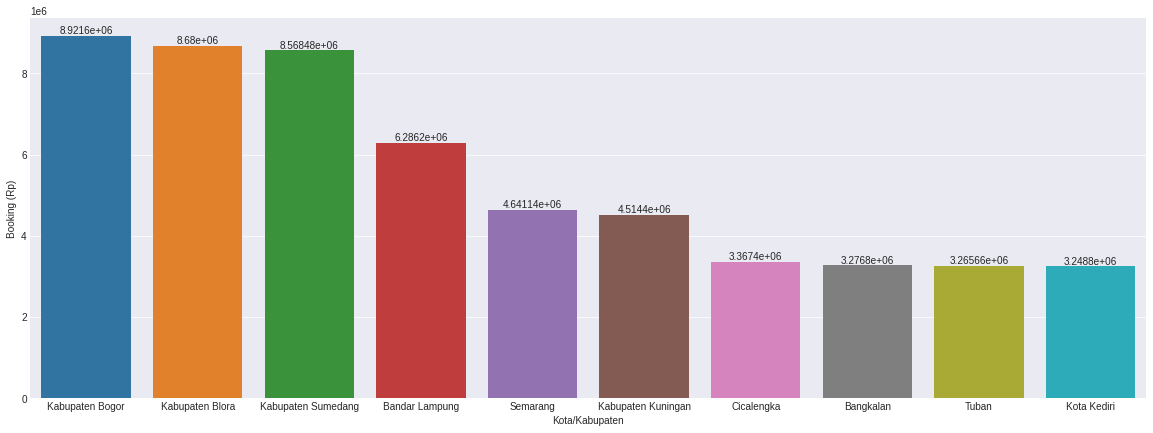

In [33]:
# Biggest Total Mean Revenue From Each Kota/Kabupaten

plt.figure(figsize=(20,7))

ax = sns.barplot(x='Kota/Kabupaten',y='Booking (Rp)',data=df_city_rev.sort_values('Booking (Rp)', ascending=False).head(10))
for i in ax.containers:
    ax.bar_label(i,)
   
plt.show()


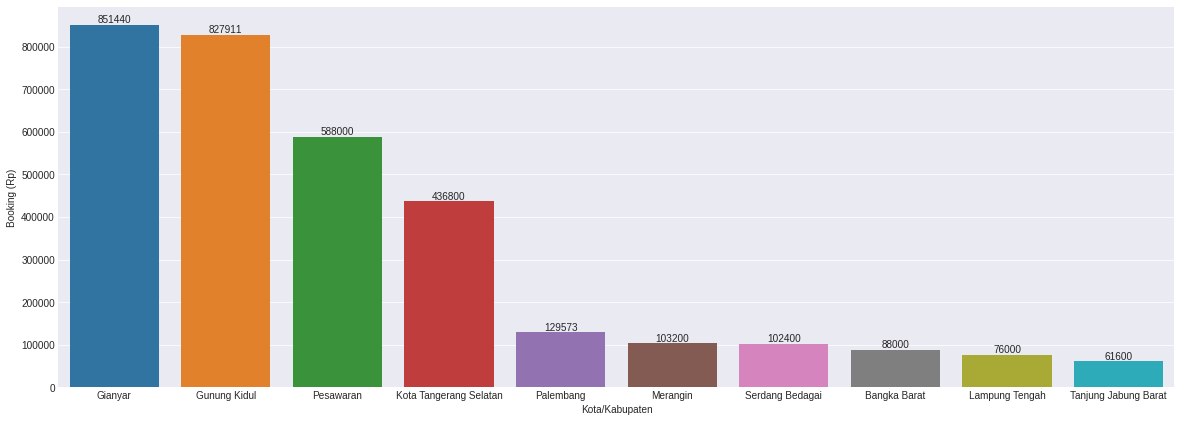

In [38]:
# Lowest Total Mean Revenue from Kota/Kabupaten

plt.figure(figsize=(20,7))

ax = sns.barplot(x='Kota/Kabupaten',y='Booking (Rp)',data=df_city_rev.sort_values('Booking (Rp)',ascending=False).tail(10))
for i in ax.containers:
    ax.bar_label(i,)
   
plt.show()

Total rata-rata revenue tertinggi berdasarkan Kota/Kabupaten dihasilkan oleh Kabupaten Bogor dengan total rata-rata Rp. 89 jt, lalu diikuti oleh Kabupaten Blora Rp.86 jt, dan Kabupaten Sumedang Rp. 85 jt. Sedangkan total rata-rata revenue terendah adalah Bangka Barat Rp. 88 rb, Lampung Tengah Rp. 76 rb, dan terakhir Tanjung Jabung Barat Rp. 61 rb.

# Best Customer

In [68]:
top_cust_rev = df[['Booking (Rp)']].groupby(df['Customer ID']).sum().sort_values('Booking (Rp)', ascending=False).reset_index()
top_cust_count = df[['Tanggal']].groupby(df['Customer ID']).count().sort_values('Tanggal',ascending=False).reset_index()
combine = top_cust_rev.merge(top_cust_count,on='Customer ID').sort_values('Booking (Rp)',ascending=False)
combine.rename(columns = {'Tanggal':'Count'}, inplace = True)

In [73]:
combine

,Customer ID,Booking (Rp),Count
0,SHOXR25910,548068240.0,134
1,SHOXR103756,184007936.0,72
2,SHOXR2889,181017525.6,44
3,SHOXR156656,147023225.6,33
4,SHOXR5701,140973363.2,58
...,...,...,...
3811,SHOXR20289,32000.0,1
3812,SHOXR153801,32000.0,1
3813,SHOXR142845,30400.0,1
3814,SHOXR160867,19200.0,1


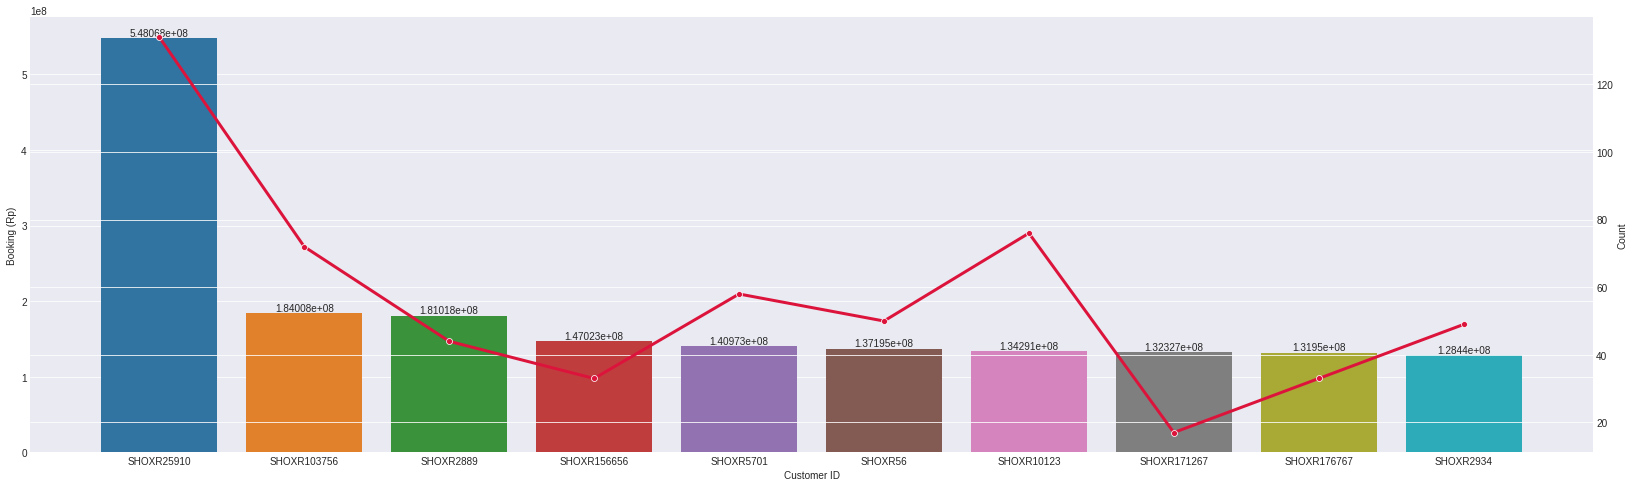

In [72]:
# Total sales and Number of order

plt.figure(figsize=(28, 8))
ax = sns.barplot(x='Customer ID', y='Booking (Rp)', data=combine.head(10))
for i in ax.containers:
    ax.bar_label(i,)

ax2 = ax.twinx()
sns.lineplot(x='Customer ID', y='Count', data=combine.head(10), marker='o', color='crimson', lw=3, ax=ax2)

plt.show()

In [71]:
df[df['Customer ID']=='SHOXR25910']

,Tanggal,Customer ID,Notes,Provinsi,Kota/Kabupaten,Kecamatan,Sales Manager,Booking (Rp),InvoiceMonth,CohortMonth,CohortIndex
12668,2020-11-04,SHOXR25910,Order - Arisan Weekly,Jawa Barat,Garut,Malangbong,SM - Denis,500000.0,2020-11-01,2020-11-01,1
12669,2020-11-04,SHOXR25910,Order - Arisan Monthly,Jawa Barat,Garut,Malangbong,SM - Denis,200000.0,2020-11-01,2020-11-01,1
12670,2020-11-06,SHOXR25910,Order - Arisan Monthly,Jawa Barat,Garut,Malangbong,SM - Denis,476000.0,2020-11-01,2020-11-01,1
12671,2020-11-07,SHOXR25910,Order - Cash,Jawa Barat,Garut,Malangbong,SM - Denis,399200.0,2020-11-01,2020-11-01,1
12672,2020-11-12,SHOXR25910,Order - Cash,Jawa Barat,Garut,Malangbong,SM - Denis,241600.0,2020-11-01,2020-11-01,1
...,...,...,...,...,...,...,...,...,...,...,...
12797,2021-10-04,SHOXR25910,Order - Arisan Monthly,Jawa Barat,Garut,Malangbong,SM - Denis,1296000.0,2021-10-01,2020-11-01,12
12798,2021-10-05,SHOXR25910,Order - Cash,Jawa Barat,Garut,Malangbong,SM - Denis,1627200.0,2021-10-01,2020-11-01,12
12799,2021-10-06,SHOXR25910,Order - Arisan Monthly,Jawa Barat,Garut,Malangbong,SM - Denis,34726400.0,2021-10-01,2020-11-01,12
12800,2021-10-08,SHOXR25910,Order - Arisan Monthly,Jawa Barat,Garut,Malangbong,SM - Denis,2711200.0,2021-10-01,2020-11-01,12


Berdasarkan grafik diatas, customer yang paling banyak menghasilkan revenue adalah customer dengan customer id SHOXR25910. dengan total revenue sebesar Rp 548 jt dan jumlah transaksi sebanyak 134 kali. Customer ini berasal dari Garut Jawa Barat dan melakukan repeat order di setiap bulannya.